In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [3]:
orig_data = pd.read_csv(r"datasets/Insurance/final_data.csv")  # Loading data
orig_data.set_index('Id', inplace=True)  # Changing index
print(orig_data.head())

listOfX = [col for col in orig_data.columns if col not in ["CarInsurance", "Id"]]  # List of parameters

inputData = orig_data[listOfX]  # Getting parameters
outputData = orig_data["CarInsurance"]  # Getting answers

X_train, X_test, y_train, y_test = train_test_split(inputData, outputData, random_state=228, test_size=0.2)  # Spliting data

    CallTime  LastContactMonth  PrevAttempts  DaysPassed  HHInsurance  \
Id                                                                      
1         70                 0             0          -1            1   
2        185                 1             0          -1            1   
3        340                 2             1         119            1   
4        819                 1             0          -1            1   
5        192                 2             0          -1            0   

    NoOfContacts  CarInsurance  
Id                              
1              2             0  
2              5             0  
3              1             1  
4              2             1  
5              1             0  


In [3]:
X_train.shape

(3056, 6)

In [4]:
y_train[:20]

Id
3075    0
1348    1
2546    0
832     0
748     1
1732    0
3915    0
2848    1
1098    1
1850    1
3679    0
3738    0
863     0
1817    0
1954    1
1533    0
3804    0
3165    0
2374    1
2141    0
Name: CarInsurance, dtype: int64

In [5]:
X_train[:20]

,CallTime,LastContactMonth,PrevAttempts,DaysPassed,HHInsurance,NoOfContacts
Id,,,,,,
3075,139,5,0,-1,0,2
1348,1230,1,0,-1,1,3
2546,72,1,0,-1,0,3
832,296,1,0,-1,1,1
748,1080,5,0,-1,0,3
1732,228,1,0,-1,1,1
3915,114,1,0,-1,1,1
2848,893,4,0,-1,0,1
1098,516,2,5,292,0,1


In [6]:
def sigFunc(res):
    yhatarino = 1 / (1 + np.exp(-res))
    return yhatarino

In [7]:
def pred(tt_X, weights, bias):
    ಠ_ಠ = np.zeros((tt_X.shape[0], 1))
    z = sigFunc(np.dot(tt_X, weights.T) + bias)

    for i in range(z.shape[0]):
        if z[i][0] > 0.5:
            ಠ_ಠ[i][0] = 1
    return ಠ_ಠ

In [8]:
def optimizerHope(batchedX, batchedy, weights, bias):
    batchedz = np.dot(batchedX, weights.T) + bias
    batcheda = sigFunc(batchedz)
    batchLen = batcheda.shape[0]
    
    cost = (-1 / batchLen) * (np.sum(batchedy * np.log(batcheda) + (1 - batchedy) * np.log(1 - batcheda)))

    dw = (1 / batchLen) * (np.dot((batcheda - batchedy).T, batchedX))
    db = (1 / batchLen) * np.sum(batcheda - batchedy)

    grads = {"dw": dw, "db": db}
    
    return grads, cost

Train Accuracy 0.7506544502617801
Test Accuracy 0.7342931937172775


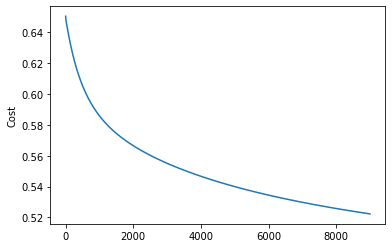

In [9]:
def LogRegHope(trainX, trainy, testX, testy, learningRate=0.00001, batch=128, epochs=9000):
    queriesNum, featuresNum = trainX[trainX.shape[0] % batch:].shape[0], trainX.shape[1]
    weights, bias = np.zeros((1, featuresNum)), 0

    tr_y, tr_X = trainy.reshape(trainy.shape[0], 1), trainX.copy()
    tt_y, tt_X = testy.reshape(testy.shape[0], 1), testX.copy()
    costList = []
    
    for epoch in range(epochs):
        for i in range(queriesNum // batch):
            batchedX = tr_X[i * batch: i * batch + batch]
            batchedy = tr_y[i * batch: i * batch + batch]
            grads, cost = optimizerHope(batchedX, batchedy, weights, bias)
            
            dw = grads["dw"]
            db = grads["db"]
            
            weights = weights - (learningRate * dw)
            bias = bias - (learningRate * db)

        costList.append(cost)
    predictions_train = pred(tr_X, weights, bias)
    print('Train Accuracy', accuracy_score(predictions_train, tr_y))
    
    predictions_test = pred(tt_X, weights, bias)
    print('Test Accuracy', accuracy_score(predictions_test, tt_y))
    plt.plot(costList)
    plt.ylabel('Cost')    
    return tt_y, predictions_test

tt_y, predictions_test = LogRegHope(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())

In [10]:
print(precision_score(tt_y, predictions_test))
print(recall_score(tt_y, predictions_test))

0.6793103448275862
0.6416938110749185


In [11]:
logisticRegr = LogisticRegression()

In [12]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
predictions = logisticRegr.predict(X_test)

In [14]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.7787958115183246


In [15]:
print(precision_score(tt_y, predictions))
print(recall_score(tt_y, predictions))

0.7804878048780488
0.6254071661237784
